In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extração dos dados em CSV

In [11]:
df = pd.read_csv('../../data/data.csv')
df.describe()

,price,original_price,sale_amount,available_quantity,health,RELEASE_YEAR
count,2400.000000,499.000000,2400.000000,2400.000000,1997.000000,1726.000000
mean,2386.525238,2436.671363,2386.525238,44.278333,0.856525,2096.016802
std,16497.952112,2557.531825,16497.952112,384.883604,0.117010,3146.955930
min,10.000000,298.880000,10.000000,1.000000,0.550000,2011.000000
25%,818.842500,999.000000,818.842500,1.000000,0.750000,2019.000000
50%,1299.995000,1481.670000,1299.995000,1.000000,0.880000,2020.000000
75%,2378.125000,2649.990000,2378.125000,1.000000,0.910000,2022.000000
max,800000.000000,14999.000000,800000.000000,5000.000000,1.000000,132761.000000


In [12]:
# Retirar outliers, utilizando valor já conhecido de mercado, caso fosse algo dynamico utilizaria a Amplitude interquartil.
df = df[df['price'] < 20000]

#Análise macro dos preços

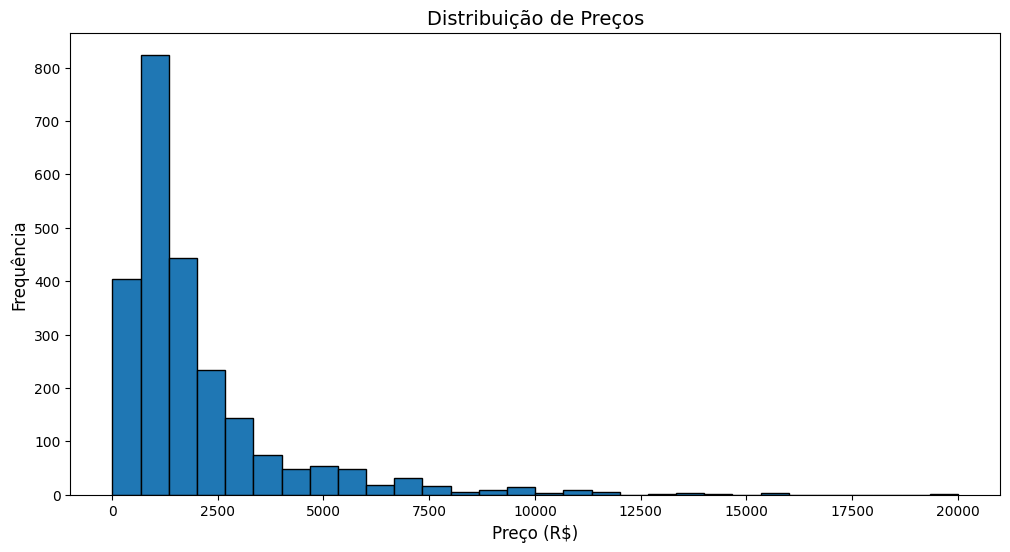

In [13]:
# Plotando a distribuição de preços
plt.figure(figsize=(12, 6))
df['price'].hist(bins=30, edgecolor='k')
plt.title('Distribuição de Preços', fontsize=14)
plt.xlabel('Preço (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(False)
plt.show()

#Podemos perceber que existe uma grande concentração entre R$ 1.000 e R$ 2.400 que são exatamente os celulares de entrada e intermediários.

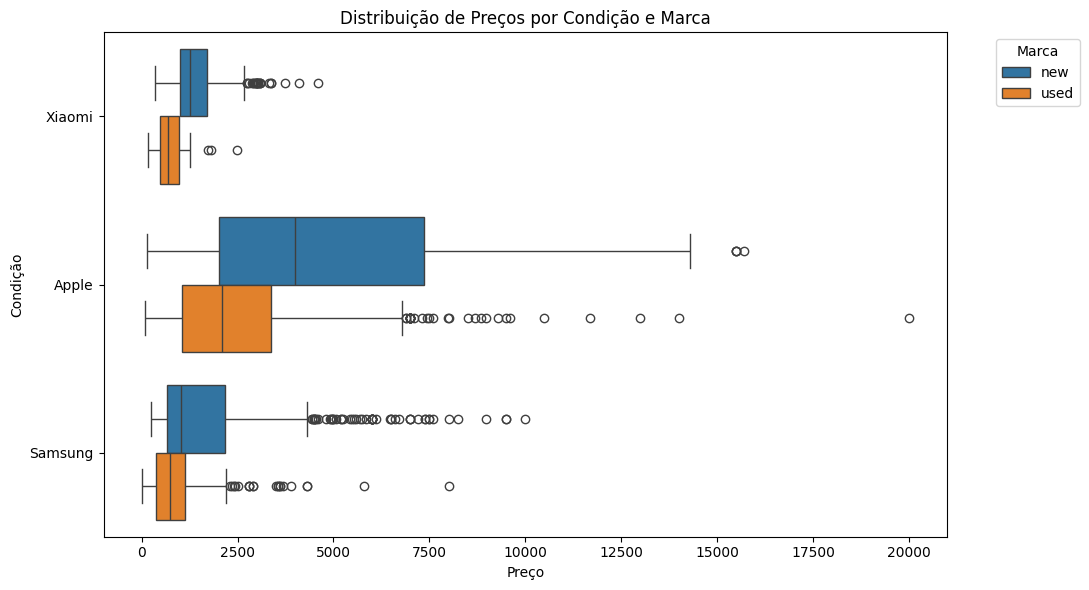

In [14]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=df[df['condition'] != 'not_specified'], x='price', y='BRAND', hue='condition')  # 'hue' adiciona a separação por 'brand'
plt.title("Distribuição de Preços por Condição e Marca")
plt.xlabel("Preço")
plt.ylabel("Condição")
plt.legend(title="Marca", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta para evitar sobreposição
plt.show()

#Aqui podemos perceber que o preço dos celulares da apple costuma ser mais elevado do que outros concorrentes e quando o item é usado o valor é bem inferior.

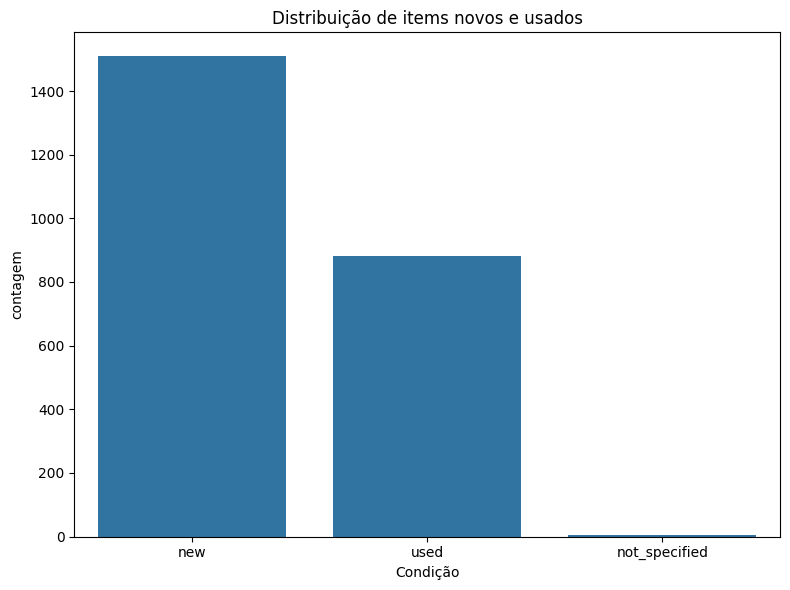

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='condition', order=df['condition'].value_counts().index)
plt.title('Distribuição de items novos e usados')
plt.xlabel('Condição')
plt.ylabel('contagem')
plt.tight_layout()
plt.show()

#Existe uma predominancia de novos.

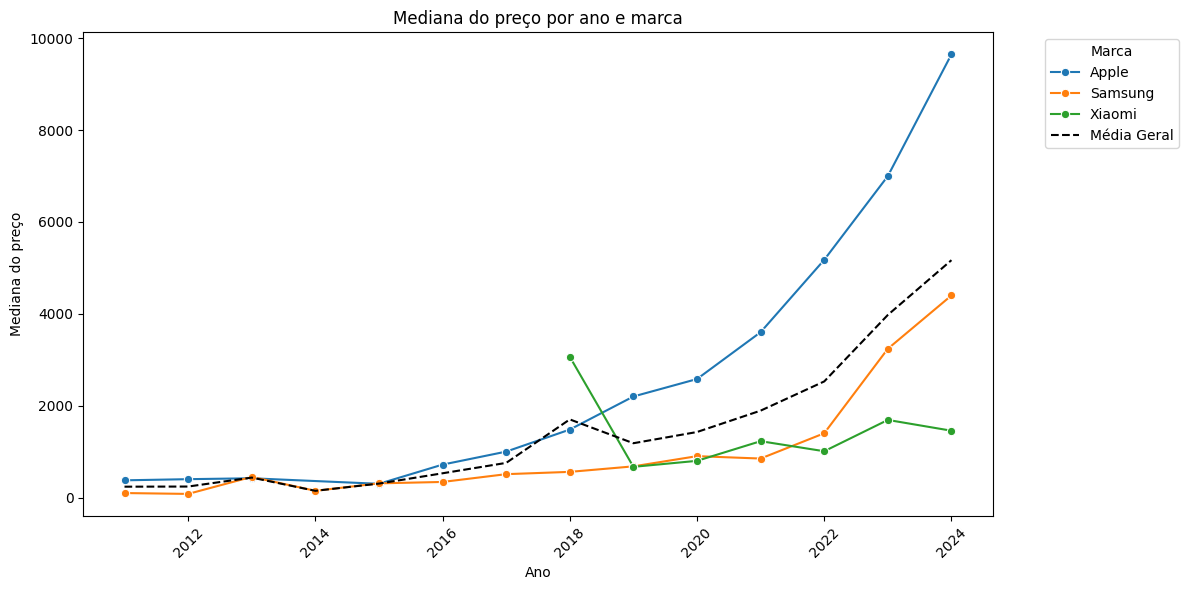

In [16]:
# Calculando o preço médio por ano para cada marca, filtrei o ano pois temos alguns outliers.
mean_price_per_year_brand = df.groupby(['BRAND', 'RELEASE_YEAR'])['price'].median().reset_index()
filtered_data = mean_price_per_year_brand[(mean_price_per_year_brand['RELEASE_YEAR'] >= 2000) & (mean_price_per_year_brand['RELEASE_YEAR'] <= 2024)]

# Criando o preço média das 3 marcas por ano.
overall_mean_price_per_year = filtered_data.groupby('RELEASE_YEAR')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))

# plotando as linhas das marcas
sns.lineplot(data=filtered_data, x='RELEASE_YEAR', y='price', hue='BRAND', marker='o')

# plotando a linha do geral
plt.plot(
    overall_mean_price_per_year['RELEASE_YEAR'], 
    overall_mean_price_per_year['price'], 
    linestyle='--', 
    color='black', 
    label='Média Geral'
)


plt.title('Mediana do preço por ano e marca')
plt.xlabel('Ano')
plt.ylabel('Mediana do preço')
plt.xticks(rotation=45)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# Aqui podemos perceber que quando mais perto da data de lançamento, mais o preço eleva



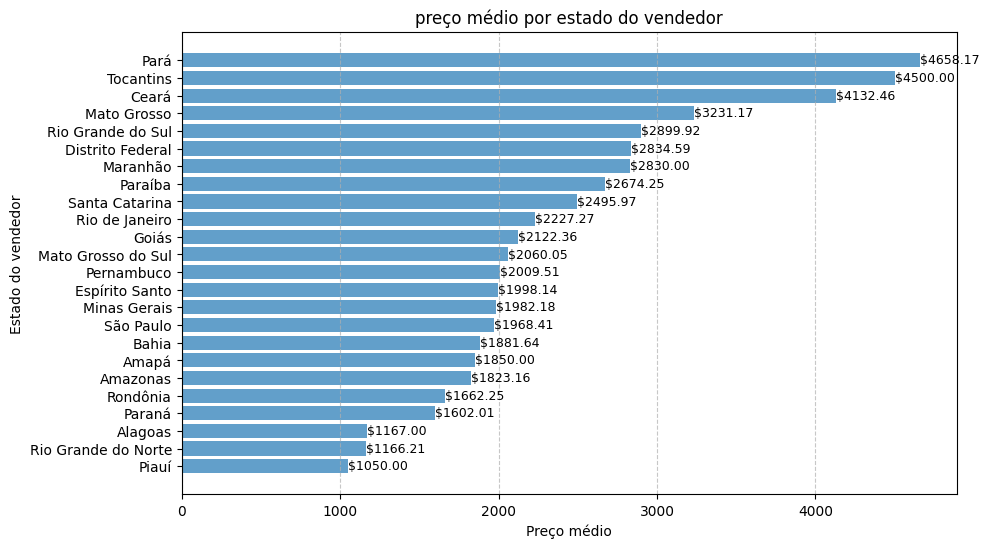

In [17]:
# Calculando a média de preço por estado
state_avg_price = df.groupby('Seller_State')['price'].mean().reset_index()
state_avg_price.columns = ['Seller_State', 'Average_Price']

# Ordenando os dados pelo preço médio
state_avg_price = state_avg_price.sort_values(by='Average_Price', ascending=True)

# Plotando o gráfico de barras horizontal com valores de preço médio
plt.figure(figsize=(10, 6))
plt.barh(state_avg_price['Seller_State'], state_avg_price['Average_Price'], alpha=0.7)
plt.title('preço médio por estado do vendedor')
plt.xlabel('Preço médio')
plt.ylabel('Estado do vendedor')

# Adicionando os valores dos preços às barras
for index, value in enumerate(state_avg_price['Average_Price']):
    plt.text(value, index, f'${value:.2f}', va='center', fontsize=9)

# Adicionando uma grade para facilitar a leitura
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
